Use the stock returns in DailyReturn.csv for this problem. DailyReturn.csv contains returns for 100 large US stocks and as well as the ETF, SPY which tracks the S&P500. 
Create a routine for calculating an exponentially weighted covariance matrix. If you have a package that calculates it for you, verify that it calculates the values you expect. This means you still have to implement it.
Use PCA and plot the cumulative variance explained by λ ∈ (0, 1) each eigenvalue for each λ chosen.
What does this tell us about values of λ and the effect it has on the covariance matrix?

In [1]:
#import packages and data for problem1.Sign a name for first column to Date and drop the first column
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df1 = pd.read_csv('DailyReturn.csv')
df1.rename(columns = {'Unnamed: 0':'Date'},
          inplace = True)
df1 = df1.drop(columns = ['Date'])
df1


,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,-0.002330,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,0.008437,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,0.003527,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,0.002033,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,-0.010555,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786
5,0.009649,0.024992,0.003651,0.015941,0.037751,-0.002520,-0.002039,0.015054,0.020040,0.006741,...,0.000658,0.009273,-0.061474,0.011733,0.008537,0.001360,-0.000223,-0.000369,0.013966,0.009913
6,0.002029,-0.018156,0.022414,-0.021511,0.034316,0.015064,0.014655,0.020983,0.025099,-0.009354,...,-0.009481,-0.003445,-0.010543,0.005972,-0.036531,0.002806,-0.008829,0.003503,-0.006574,0.004448
7,0.001720,-0.005607,-0.006785,-0.016107,0.084910,-0.030727,-0.030326,0.019810,0.010169,-0.002683,...,-0.001848,0.002799,-0.001360,0.008646,0.011714,-0.004183,0.008757,0.019475,0.015125,0.017713
8,0.004043,0.007116,0.011416,-0.001615,-0.030275,0.013488,0.014530,-0.005758,0.022225,0.005904,...,-0.002564,0.007388,0.002270,0.016858,0.003961,-0.013961,0.015835,0.001802,-0.002018,0.010053
9,0.006105,0.009799,0.002611,0.021508,0.035717,0.008014,0.006355,0.010790,0.007462,0.002744,...,0.012375,0.015971,0.018347,0.004833,0.022914,0.015445,-0.002898,0.007375,0.013064,0.016488


In [2]:
## Write exponentially weighted covariance matrix function with input data and Lam
def ewCovar(x, lam):
    m, n = x.shape
    w = np.empty(m, dtype = float)
    ## Calculate the mean for each column
    xm = x.mean()
    ## Each x delete it stock return mean
    x = x - xm
    ## Calculate the weighted
    for i in range (0,m):
        w[i] = (1 - lam)*lam**(m-i-1)
    w = w / sum(w)
    ## Change w shape (60, ) to (60, 1)
    w = w[:, np.newaxis]
    ## make x to array for elementwise multiple
    x1 = np.array(x)
    res = np.multiply(w, x1)
    ## Transpose
    res = res.T
    ## matrix multiplication
    res = res @ x
    return res

In [3]:
## Test exponentially weighted convariance matrix function
covar = ewCovar(df1,0.97)
covar

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,0.000084,1.069457e-04,0.000122,0.000093,0.000231,0.000107,0.000106,0.000121,0.000241,0.000026,...,0.000070,2.003612e-05,-0.000016,0.000103,1.079285e-05,2.140047e-05,0.000090,0.000125,0.000081,0.000086
1,0.000107,2.687523e-04,0.000198,0.000171,0.000433,0.000146,0.000148,0.000143,0.000373,-0.000009,...,0.000035,-1.599945e-05,-0.000065,0.000160,3.951258e-06,1.140771e-07,0.000078,0.000116,0.000037,0.000082
2,0.000122,1.975317e-04,0.000291,0.000149,0.000409,0.000206,0.000203,0.000181,0.000407,-0.000004,...,0.000007,-1.092893e-07,-0.000046,0.000159,-1.654457e-06,9.815150e-06,0.000089,0.000083,0.000033,0.000073
3,0.000093,1.711137e-04,0.000149,0.000233,0.000303,0.000141,0.000143,0.000160,0.000385,-0.000008,...,0.000028,-2.807246e-06,-0.000051,0.000143,4.137187e-06,-8.519378e-06,0.000070,0.000035,0.000044,0.000102
4,0.000231,4.327650e-04,0.000409,0.000303,0.002002,0.000286,0.000289,0.000296,0.000888,-0.000041,...,0.000146,-9.735230e-05,-0.000113,0.000344,4.242842e-05,9.278996e-06,0.000184,0.000330,0.000185,0.000109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000021,1.140771e-07,0.000010,-0.000009,0.000009,0.000011,0.000016,0.000094,-0.000068,0.000044,...,0.000046,1.928247e-05,0.000043,0.000013,6.786591e-07,1.761539e-04,0.000056,0.000093,0.000067,0.000030
97,0.000090,7.844996e-05,0.000089,0.000070,0.000184,0.000107,0.000107,0.000120,0.000143,0.000045,...,0.000112,1.947433e-05,0.000012,0.000112,1.043774e-05,5.646761e-05,0.000265,0.000220,0.000119,0.000135
98,0.000125,1.156588e-04,0.000083,0.000035,0.000330,0.000119,0.000122,0.000104,0.000261,0.000124,...,0.000291,4.185656e-05,0.000057,0.000130,-1.569134e-06,9.281158e-05,0.000220,0.000748,0.000268,0.000201
99,0.000081,3.749775e-05,0.000033,0.000044,0.000185,0.000067,0.000067,0.000116,0.000149,0.000128,...,0.000274,4.570576e-05,0.000055,0.000071,4.678436e-06,6.671775e-05,0.000119,0.000268,0.000308,0.000082


In [4]:
from numpy.linalg import eigh
#Write PCA function
def PCA_pctExplained(a):
    m, n = a.shape
    egnvalues, egnvectors = eigh(a)
    ## reverse the value, sort from high to lower
    vals = sorted(egnvalues, reverse = True)
    ##Calculate the total Eigenvalues
    total = sum(vals)
    
    out = np.empty(n, dtype = float)
    s = 0.0
    for i in range(0, n):
        s += vals[i]
        out[i] = s/total
        
    return out

In [5]:
##Test PCA Function
expl = PCA_pctExplained(covar)
expl

array([0.31457288, 0.47043096, 0.54040358, 0.58898957, 0.63068385,
       0.66853732, 0.69994997, 0.72590994, 0.74859105, 0.76758181,
       0.78431232, 0.79928225, 0.81330479, 0.82705066, 0.8395567 ,
       0.85104801, 0.8620743 , 0.87242365, 0.88214094, 0.89083976,
       0.89875057, 0.90580692, 0.91260856, 0.91928662, 0.92538222,
       0.93084043, 0.93585303, 0.94067243, 0.94523781, 0.94956888,
       0.95378529, 0.9575773 , 0.9610966 , 0.96451441, 0.96777167,
       0.97077916, 0.97370197, 0.97633638, 0.97886856, 0.98125053,
       0.98345314, 0.98547727, 0.98724745, 0.98888714, 0.99040571,
       0.99175754, 0.99296536, 0.99401854, 0.99496298, 0.99580272,
       0.99658176, 0.99722733, 0.99780481, 0.99831128, 0.9988073 ,
       0.99920756, 0.99953279, 0.99979794, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

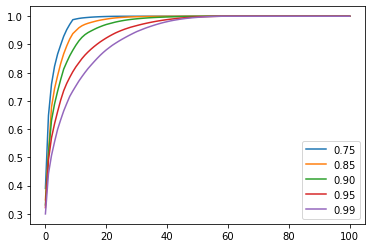

In [6]:
## Store Data Value
a1 = PCA_pctExplained(ewCovar(df1,0.75))
a2 = PCA_pctExplained(ewCovar(df1,0.85))
a3 = PCA_pctExplained(ewCovar(df1,0.90))
a4 = PCA_pctExplained(ewCovar(df1,0.95))
a5 = PCA_pctExplained(ewCovar(df1,0.99))

## Plot 
plt.plot(a1, label = '0.75')
plt.plot(a2, label = '0.85')
plt.plot(a3, label = '0.90')
plt.plot(a4, label = '0.95')
plt.plot(a5, label = '0.99')
plt.legend()
plt.show()

# Problem 2

In [7]:
## near_psd

import math
from numpy.linalg import eigh

def near_psd(A, epsilon=0):
    m,n = A.shape
    
    invSD = None
    out = np.array(A.copy()) 
    
    #calculate the correlation matrix if we got a covariance
    
    #if it gets passed a matrix that is not a correlation matrix (i.e. there is not 1 on the diagonals), 
    #then it converts it to a correlation matrix
    if np.sum(np.diag(out) == 1) != n:  
        invSD = np.diag(1 / np.sqrt(np.diag(out)))
        out = invSD * out * invSD
    
    
    #SVD, update the eigen value and scale
    eigval, eigvec = np.linalg.eigh(out)
    val = np.matrix(np.maximum(eigval,epsilon))
     
    vec = np.matrix(eigvec)
    T = 1/(np.multiply(vec,vec) * val.T)
    T = np.matrix(np.sqrt(np.diag(np.array(T).reshape((n)) )))
    l = np.diag(np.array(np.sqrt(val)).reshape((n)))
    B = T * vec * l
    out = B*B.T
    
    
    #Add back the variance
    if invSD != None: 
        invSD = np.diag(1 / np.diag(invSD))
        out = invSD * out * invSD
    
    return out

In [8]:
## cholesky assums PSD
import math
from numpy.linalg import eigh

def chol_psd(root, a):
    n = a.shape[0]
    
    for j in range(n):
            s = 0.0
            if j > 0:
                s = root[j, :j] @ root[j, :j].T
            temp = a[j,j] - s
            if -1e-8 <= temp <= 0:
                temp = 0.0
            root[j,j] = np.sqrt(temp)
            if root[j,j] == 0.0:
                continue
            ir = 1.0 / root[j,j]
            for i in range((j + 1), n):
                s = root[i, :j] @ root[j, :j].T
                root[i, j] = (a[i,j] - s) * ir
    return root


In [9]:
##Higham's 2002 Helper Function
import math
from numpy.linalg import eigh


def _getAplus(A):
    vals, vecs =eigh(A)
    vals = np.matrix(np.diag(np.maximum(vals, 0)))
    return vecs*vals*vecs.T

def _getPS(A, W = None):
    W05 = np.matrix(np.sqrt(W))
    iW = W05.I
    return (iW @ _getAplus(W05 @ A @ W05) @ iW)

def _getPu(A, W = None):
    Aret = A.copy()
    for i in range(0, A.shape[0]):
        Aret[i,i] = 1.0
    return Aret

def _wgtNorm(A, W = None):
    W05 = np.sqrt(W)
    W05 = W05 @ A @ W05
    return (W05 * W05).sum()
    

In [10]:
## Higham's 2002 Nearest PSD funtion
import math
from numpy.linalg import eigh

def higham_nearestPSD(pc, W = None, epsilon = 1e-9, maxIter = 100, tol = 1e-9):
    n = pc.shape[0]
    if W == None:
        W = np.identity(n)

    deltaS = np.zeros((n,n))

    Yk = pc.copy()
    norml = 9223372036854775807
    i=1

    while i <= maxIter:
        # println("$i - $norml")
        Rk = Yk - deltaS
        #Ps Update
        Xk = _getPS(Rk, W)
        deltaS = Xk - Rk
        #Pu Update
        Yk = _getPu(Xk, W)
        #Get Norm
        norm = _wgtNorm(Yk - pc, W)
        #Smallest Eigenvalue
        vals, vecs = eigh(Yk)
        minEigVal = np.min(vals)

        # print("Yk: "); display(Yk)
        # print("Xk: "); display(Xk)
        # print("deltaS: "); display(deltaS)

        if ((norm - norml) < tol) and (minEigVal > -epsilon):
            # Norm converged and matrix is at least PSD
            break

        # println("$norml -> $norm")
        norml = norm
        i += 1
        
    if i < maxIter: 
        print("Converged in %d iterations.\n" % i)
    else:
        print("Convergence failed after %d iterations.\n" % (i-1))

    return Yk

In [11]:
## Create a matrix
n = 500
sigma = np.full((n, n), 0.9)
for i in range(n):   
    sigma[i,i] = 1.0
sigma[1,2] = 0.7357
sigma[2,1] = 0.7357

In [12]:
import numpy.linalg as li

def is_psd(x):
    return np.all(li.eigvals(x) >= -1e-8)

In [13]:
## Calculate running time
import time

def F_norm (cov, cov_psd):
    temp = cov - cov_psd
    return LA.norm(temp, 'fro')

start1 = time.time()

near = near_psd(sigma)
is_psd(near)

end1 = time.time()

start2 = time.time()

hig = higham_nearestPSD(sigma)
is_psd(hig)

end2 = time.time()

running = []
running.append(end1 - start1)
running.append(end2 - start2)

Converged in 26 iterations.



In [14]:
from numpy import linalg as li

def F_norm (cov, cov_psd):
    temp = cov - cov_psd
    return li.norm(temp, 'fro')

In [15]:
#Calculate Norm
norm = []
norm.append(F_norm(sigma, near))
norm.append(F_norm(sigma, hig))
norm

[0.6275226557663726, 0.08964799527300794]

In [16]:
name = ['Near_Psd', 'Higham2002_psd']
result = pd.DataFrame(list(zip(name, norm, running)), columns = ['Name', 'Norm', 'Time'])
result

,Name,Norm,Time
0,Near_Psd,0.627523,0.114829
1,Higham2002_psd,0.089648,3.136185


# Problem 3

In [17]:
## Correlation
def getCor(cov):
    cov_diag = np.diag(cov)
    invSD = np.diag(np.divide(1, np.sqrt(cov_diag)))
    cor = invSD * cov * invSD
    return cor

In [18]:
## Simulate Normal Function
def simulateNormal(cov,nsim):
    if(cov.shape[0] != len(cov)):
        raise exception("covariance matrix is not square")
        
    n = cov.shape[0]
    root = np.zeros(cov.shape)    
    root = chol_psd(root, cov)
    np.random.seed(1998)
    z = np.random.normal(size=(n, nsim))
    ans = root @ z
    return ans

In [19]:
def simulate_pca(cov, nsim, target):

    vals, vecs = eigh(cov)
    
    tv = sum(vals)
    vals = vals[::-1]
    vecs = vecs[::-1]
    
    vals = np.maximum(vals, 0)
    
    cumm = np.cumsum(vals) / tv
    i=0
    for i in range(len(vals)):
        if cumm[i] < target:
            i += 1
        else:
            break
            
    vals = vals[0:i+1]
    vecs = vecs[:, :i+1]
    
    B = vecs @ np.diag(np.sqrt(vals))
    np.random.seed(1234)
    z = np.random.normal(size=(len(vals), nsim))
    return B @ z

In [20]:
## Pearson Correlation 
pearson_cor = np.matrix(df1.corr())
pearson_var = df1.var()
pearson_cov = np.matrix(df1.cov())

In [21]:
## Expoentially weighted 
ewma_cov = np.matrix(ewCovar(df1, 0.97))
ewma_var = np.diag(ewma_cov)
ewma_cor = getCor(ewma_cov)


In [22]:
## Covariance
def CombineV(var, cor):
    std = np.sqrt(var)
    n = len(var)
    cov = np.matrix(np.zeros((n,n)))
    for i in range(n):
        for j in range(n):
            cov[i,j] = cor[i,j] * std[i] * std[j]
            
    return cov

In [23]:
## Get coveriance for pearson
Pearson = CombineV(pearson_var, pearson_cor)

## Getcoveriance for ewma
Ewma = CombineV(ewma_var, ewma_cor)

## Get coveriance for Pearson and ewma
Ewma_Pearson = CombineV(pearson_var, ewma_cor)

## Get coveriance for ewma and Pearson
Pearson_Ewma = CombineV(ewma_var, pearson_cor)


In [24]:
## Setting
matrixType = ["PEARSON", "EWMA_COR_PEARSON_STD", "EWMA", "PEARSON_COR_EWMA_STD"]
simType = ["Full", "PCA=1", "PCA=0.75", "PCA=0.5"]

matrix = []
simulation = []
runtimes = []
norms = []

In [25]:
nsim = 25000
for sim in simType:
    for mat in matrixType:
        global i
        matrix.append(mat)
        simulation.append(sim)
        elapse = 0.0
        
        if mat == "PEARSON":
            c = Pearson
        elif mat == "EWMA_COR_PEARSON_STD":
            c = Ewma_Pearson
        elif mat == "EWMA":
            c = Ewma
        elif mat == "PEARSON_COR_EWMA_STD":
            c = Pearson_Ewma
         
            
        if sim == "Full":
            st = time.time()
            s = simulateNormal(c, nsim)
            end = time.time()
            elapse = end - st
            
        elif sim =="PCA=1":
            st = time.time()
            s = simulate_pca(c,25000,1)
            end = time.time()
            elapse = end - st
            
        elif sim=="PCA=0.75":
            st = time.time()
            s = simulate_pca(c,25000,0.75)
            end = time.time()
            elapse = end - st
            
        elif sim == "PCA=0.5":
            st = time.time()
            s = simulate_pca(c,25000,0.5)
            end = time.time()
            elapse = end - st
        

        covar = np.cov(s)
        runtimes.append(elapse)
        norms.append(F_norm(covar,c))
        i = i + 1

In [26]:
## Create the final output DataFrame
outTable = pd.DataFrame(list(zip(matrix, simulation, norms, runtimes,)), columns = ['Matrix', 'Simulation', 'Norm', 'Runtimes'])
outTable

,Matrix,Simulation,Norm,Runtimes
0,PEARSON,Full,0.000188,0.178729
1,EWMA_COR_PEARSON_STD,Full,0.000182,0.147698
2,EWMA,Full,0.000178,0.162535
3,PEARSON_COR_EWMA_STD,Full,0.000184,0.144133
4,PEARSON,PCA=1,0.016376,0.081993
5,EWMA_COR_PEARSON_STD,PCA=1,0.017701,0.087832
6,EWMA,PCA=1,0.017424,0.156085
7,PEARSON_COR_EWMA_STD,PCA=1,0.016366,0.117849
8,PEARSON,PCA=0.75,0.016449,0.026298
9,EWMA_COR_PEARSON_STD,PCA=0.75,0.017758,0.028116
